# Video Games Sales Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv('vgsales.csv')   # read data

In [3]:
data.head()   # cheeck head

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.info()    # data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
data.dtypes     # data types

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
data.isnull().sum()   # null value

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
(data.isnull().sum()/len(data))* 100        #missing value percentage 

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [8]:
data.describe()       # Statistics in a dataset

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
data.duplicated()       # duplicate on dataset

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [10]:
data.sample(3)     # dataset views

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3108,3110,Cartoon Network Block Party / Cartoon Network ...,GBA,2005.0,Misc,THQ,0.47,0.17,0.00,0.01,0.65
4600,4602,Grandia,SAT,1997.0,Role-Playing,ESP,0.00,0.00,0.42,0.00,0.42
11295,11297,SeaWorld Adventure Parks: Shamu's Deep Sea Adv...,GBA,2005.0,Adventure,Activision,0.06,0.02,0.00,0.00,0.08


In [11]:
data.shape       # rows and columns in dataset

(16598, 11)

# Data Cleansing 

In [12]:
df =  data.dropna()   # drop missing values

In [13]:
df.isnull().sum()     # re-check null value

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
df.shape

(16291, 11)

# Data Visualisation 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
platform_counts= df['Platform'].value_counts()     # showing platform counts

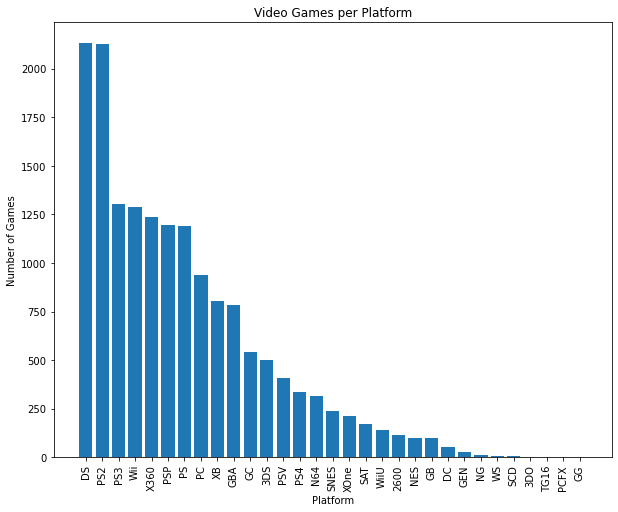

In [17]:
# Video games per Platform 

plt.figure(figsize= (10,8))
plt.bar(platform_counts.index, platform_counts.values)
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.title('Video Games per Platform')
plt.xticks(rotation= 90)
plt.show()

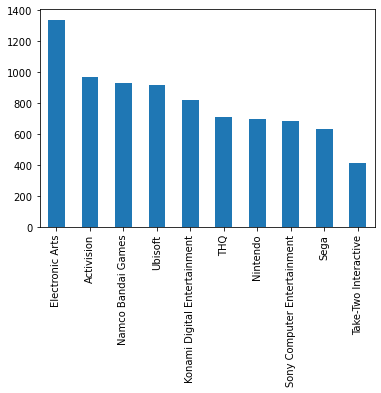

In [18]:
# Top 10 Video games Publisher

df['Publisher'].value_counts().head(10).plot(kind= 'bar');

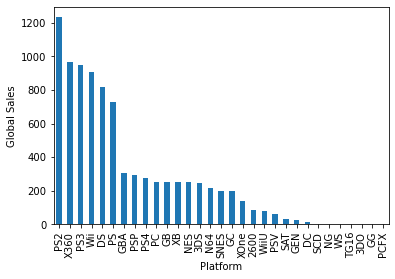

In [19]:
# Global sales

df['Global_Sales'].groupby(df['Platform']).sum().sort_values(ascending= False).plot(kind= 'bar')
plt.ylabel('Global Sales');

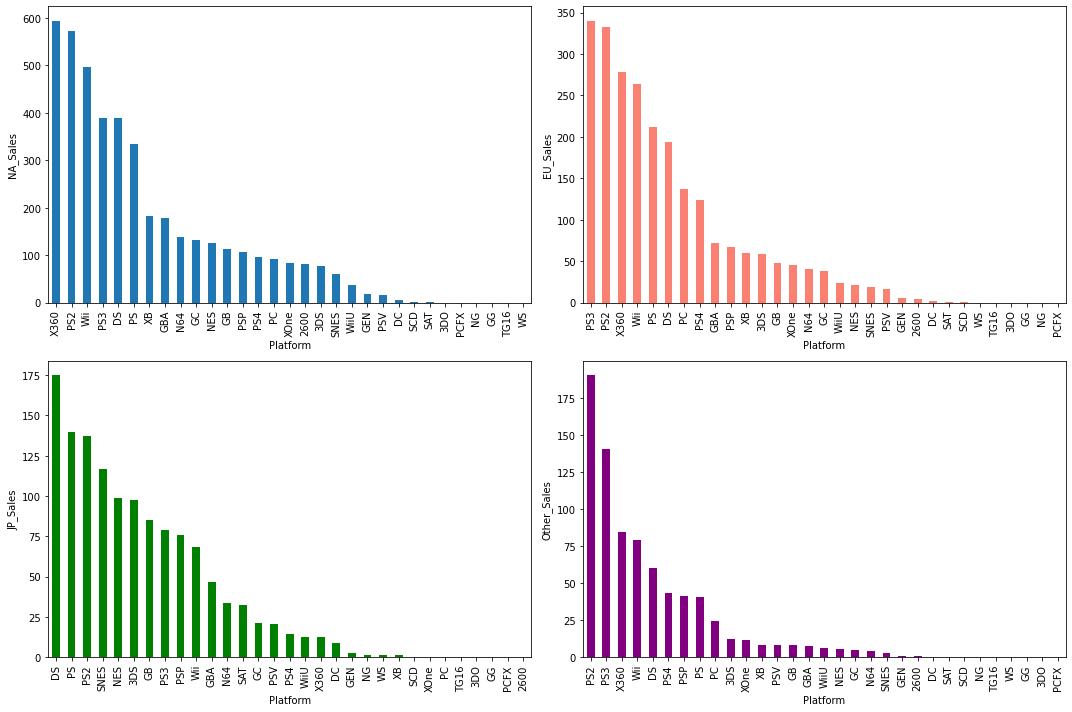

In [20]:
# Sales in other markets (Europe (EU), North America (NA), Japan (JP) and other regions)

fig, ax= plt.subplots (2,2, figsize= (15,10))

df['NA_Sales'].groupby(df['Platform']).sum().sort_values(ascending= False).plot(kind= 'bar', ax= ax[0][0])
ax[0][0].set_ylabel('NA_Sales')

df['EU_Sales'].groupby(df['Platform']).sum().sort_values(ascending= False).plot(kind= 'bar', ax= ax[0][1], color='salmon')
ax[0][1].set_ylabel('EU_Sales')

df['JP_Sales'].groupby(df['Platform']).sum().sort_values(ascending= False).plot(kind= 'bar', ax= ax[1][0], color= 'green')
ax[1][0].set_ylabel('JP_Sales')

df['Other_Sales'].groupby(df['Platform']).sum().sort_values(ascending= False).plot(kind= 'bar', ax= ax[1][1], color= 'purple')
ax[1][1].set_ylabel('Other_Sales')

fig.tight_layout();

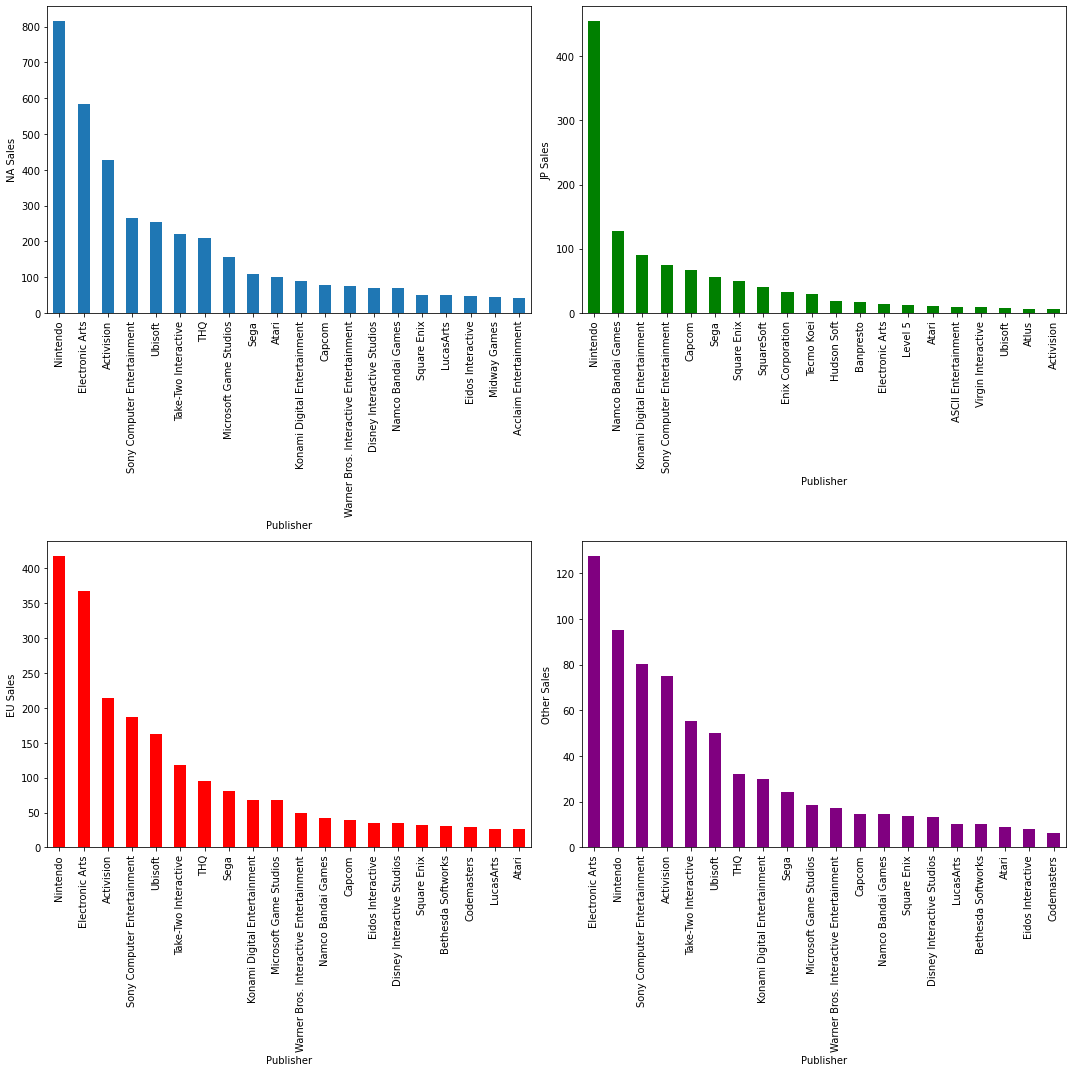

In [21]:
# sales by publishers in four markets

fig, ax = plt.subplots(2,2, figsize=(15,15))

df['NA_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).head(20).plot(kind='bar', ax = ax[0][0])
ax[0][0].set_ylabel('NA Sales')

df['JP_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).head(20).plot(kind="bar", ax = ax[0][1], color = 'green')
ax[0][1].set_ylabel('JP Sales')

df['EU_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).head(20).plot(kind="bar", ax = ax[1][0], color = 'red')
ax[1][0].set_ylabel('EU Sales')

df['Other_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).head(20).plot(kind="bar", ax = ax[1][1], color = 'purple')
ax[1][1].set_ylabel('Other Sales')

fig.tight_layout();

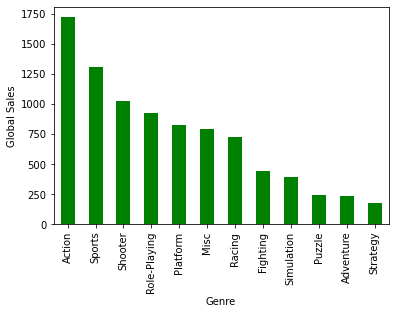

In [22]:
# global sales by genre

df['Global_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).plot(kind = 'bar', color= 'green')
plt.ylabel('Global Sales');

# Publisher

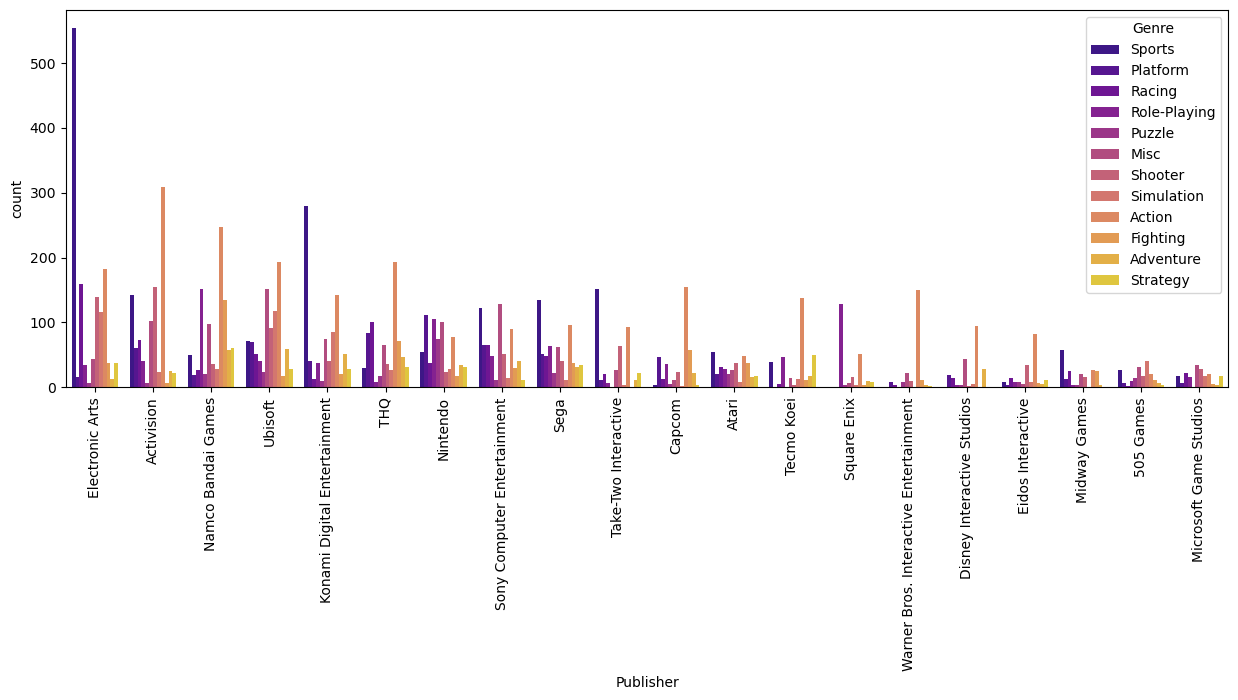

In [23]:
# genre by publisher

plt.figure(figsize=(15,5), dpi = 100)
sns.countplot(data = df, x = df['Publisher'], hue ='Genre', 
              order = df['Publisher'].value_counts().iloc[:20].index, palette='plasma')
plt.xticks(rotation = 90);

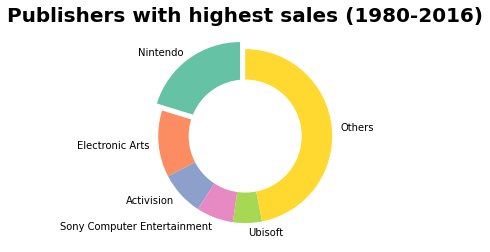

In [29]:
# publishers with highest sales

region = 'Global_Sales'
top5 = df [['Publisher',region]]
others = (top5.groupby('Publisher').sum().sort_values(by=region, ascending=False)[5:].Global_Sales.sum())
top5 = top5.groupby('Publisher').sum().sort_values(by=region, ascending=False)[:5]
top5.loc['Others'] = others
top5_arr = np.reshape(top5.values,-1)
top1_share = f'{round(top5_arr[0] / top5_arr.sum() * 100,1)}%'

plt.pie(
    top5_arr,
    labels = top5.index,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set2'),
    explode = [0.1,0,0,0,0,0],
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')

plt.gcf().gca().add_artist(hole)

plt.title('Publishers with highest sales (1980-2016)',fontdict={'size':20},fontweight = 'bold')
plt.show()

In [30]:
comp = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
comp_map = comp.groupby(by=['Genre']).sum()

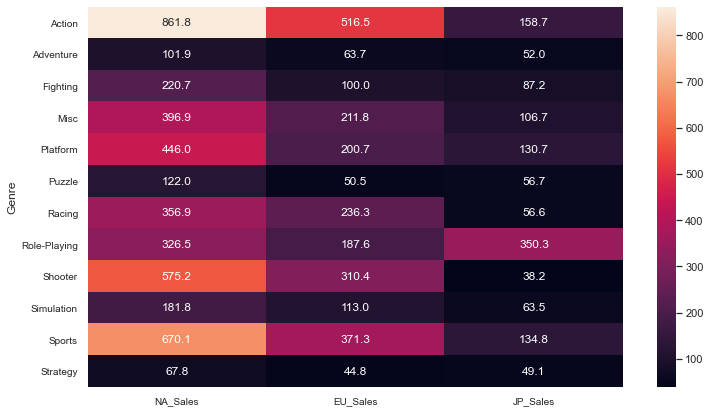

In [31]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [32]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,861.77
1,Adventure,NA_Sales,101.93
2,Fighting,NA_Sales,220.74
3,Misc,NA_Sales,396.92
4,Platform,NA_Sales,445.99


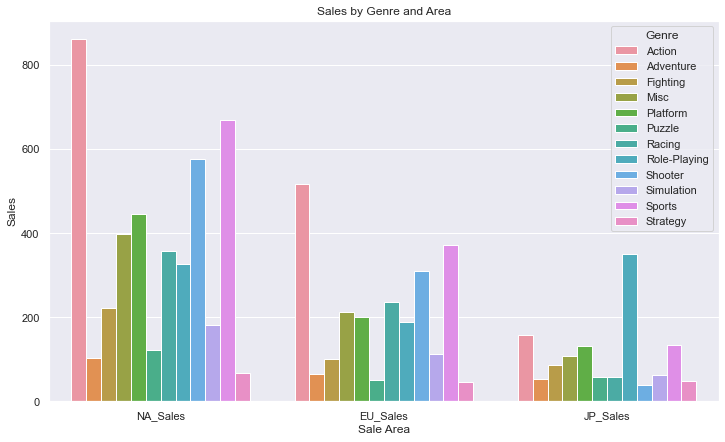

In [33]:
plt.figure(figsize=(12, 7))
sns.barplot(data=comp_table, x='Sale_Area', y='Sale_Price', hue='Genre')
plt.title('Sales by Genre and Area')
plt.xlabel('Sale Area')
plt.ylabel('Sales')

plt.show()